# Web apps

## Settings

A traditional webapp has a server-side component and a client-side component.


## Elements of a web app

Front end:
- HTML
- CSS (styling)
- Javascript (client-side / browser coding)

Back end:
- Web server (e.g. Apache, Nginx, ...)
- Server
- Data storage (SQL, )


## In this course

Front end: Dash
Back end: Dash + Pandas (data processing)




## Part I. Pandas

In data science, ML, we *expect* to see tabular data.  Pandas is a Python module that manipulates tabular data.  Pandas is widely used in Data Science.

Key concepts:
- Data frames - 2D structure that has rows and columns. Think of Excel sheets.

- Series - 1D structure.  Think of an Excel row or Excel column.

Key operations:
- Indexing
    - iloc - integer indexing (series)
    - loc - indexing using labels
    - boolean indexing
    
- Selecting
    - head - top rows (df)
    - tail - bottom rows (df)
    - sample - random rows (df)

- Summarizing
    - describe
    - value_counts
    - min, max, med, std, mean, var, ...

- Groupy
    - group data with the same values into groups.
    - then aggregate data in each group with a statistical summarization
  

In [1]:
import pandas

df = pandas.read_csv('~/Dropbox/datasets/iris.csv')

In [16]:
first_row = df.iloc[0]

In [22]:
second_row = df.iloc[1]

In [24]:
second_row

SepalLength       4.9
SepalWidth          3
PetalLength       1.4
PetalWidth        0.2
Species        setosa
Name: 1, dtype: object

In [29]:
second_row.PetalLength

1.4

In [30]:
second_row.keys

<bound method Series.keys of SepalLength       4.9
SepalWidth          3
PetalLength       1.4
PetalWidth        0.2
Species        setosa
Name: 1, dtype: object>

In [31]:
df2 = df.sample(10)
df2

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
114,5.8,2.8,5.1,2.4,virginica
0,5.1,3.5,1.4,0.2,setosa
36,5.5,3.5,1.3,0.2,setosa
20,5.4,3.4,1.7,0.2,setosa
117,7.7,3.8,6.7,2.2,virginica
88,5.6,3.0,4.1,1.3,versicolor
108,6.7,2.5,5.8,1.8,virginica
90,5.5,2.6,4.4,1.2,versicolor
116,6.5,3.0,5.5,1.8,virginica
48,5.3,3.7,1.5,0.2,setosa


In [51]:
# indexing with indices
df2.iloc[0]

SepalLength          5.8
SepalWidth           2.8
PetalLength          5.1
PetalWidth           2.4
Species        virginica
Name: 114, dtype: object

In [52]:
# indexing with labels
df2.loc[114]

SepalLength          5.8
SepalWidth           2.8
PetalLength          5.1
PetalWidth           2.4
Species        virginica
Name: 114, dtype: object

In [35]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

In [37]:
df.SepalLength.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLength, dtype: float64

In [38]:
a = df.SepalLength > 5.84

In [39]:
type(a)

pandas.core.series.Series

In [41]:
a.head()

0    False
1    False
2    False
3    False
4    False
Name: SepalLength, dtype: bool

In [50]:
b = [False]*150
b[0] = b[2] = True

# Indexing with a boolean series
df3 = df[ b ]
df3

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [49]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [54]:
df.SepalLength.mean()

5.843333333333335

In [55]:
# Selecting rows with Sepal Length above average.

b = df[ df.SepalLength > df.SepalLength.mean() ]
b.sample(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
123,6.3,2.7,4.9,1.8,virginica
62,6.0,2.2,4.0,1.0,versicolor
71,6.1,2.8,4.0,1.3,versicolor
126,6.2,2.8,4.8,1.8,virginica
65,6.7,3.1,4.4,1.4,versicolor
118,7.7,2.6,6.9,2.3,virginica
141,6.9,3.1,5.1,2.3,virginica
145,6.7,3.0,5.2,2.3,virginica
73,6.1,2.8,4.7,1.2,versicolor
63,6.1,2.9,4.7,1.4,versicolor


In [63]:
# Selecting rows with Sepal Length above average in the setosa species.

b = df[ (df.SepalLength > df.SepalLength.mean()) & (df.Species == 'virginica') ]
b.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
100,6.3,3.3,6.0,2.5,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica


In [65]:
df.Species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

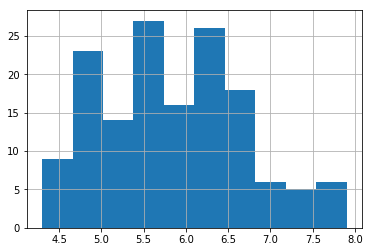

In [67]:
from matplotlib import pyplot
df.SepalLength.hist()

In [69]:
# Compute the average sepal lengths, petal lengths, etc. of data in each species.

df4 = df.groupby('Species').mean()

In [70]:
df4

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [71]:
df4.iloc[0]

SepalLength    5.006
SepalWidth     3.428
PetalLength    1.462
PetalWidth     0.246
Name: setosa, dtype: float64

In [72]:
df4.loc['setosa']

SepalLength    5.006
SepalWidth     3.428
PetalLength    1.462
PetalWidth     0.246
Name: setosa, dtype: float64

In [73]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Part II: Dash

See external code.